# Omicrons - Project One - US Election

---
## Historical Analysis

In [1]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
#import os
#import time
from scipy.stats import linregress
import datetime

#Import API Keys
#from config import gkey


In [2]:
h_election_df = pd.read_csv('Resources/1976-2016-president.csv')

In [3]:
h_election_df.shape

(3740, 14)

In [4]:
h_election_df.dtypes

year                int64
state              object
state_po           object
state_fips          int64
state_cen           int64
state_ic            int64
office             object
candidate          object
party              object
writein              bool
candidatevotes      int64
totalvotes          int64
version             int64
notes             float64
dtype: object

In [5]:
h_election_df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN


In [6]:
#Data Frame Cleansing
c_election_df=h_election_df[['year','state','state_po','candidate','party','candidatevotes']]
c_election_df=c_election_df.rename(columns={'year':'Year','state':'State','state_po':'State Cd','candidate':'Candidate','party':'Party','candidatevotes':'Votes'})
c_election_df['Party'] = c_election_df['Party'].replace({'democrat': 'Democrat', 'republican': 'Republican'})
c_election_df.loc[(c_election_df['Party']!='Democrat') & (c_election_df['Party']!='Republican'), 'Party']='Other'
c_election_df.head()

,Year,State,State Cd,Candidate,Party,Votes
0,1976,Alabama,AL,"Carter, Jimmy",Democrat,659170
1,1976,Alabama,AL,"Ford, Gerald",Republican,504070
2,1976,Alabama,AL,"Maddox, Lester",Other,9198
3,1976,Alabama,AL,"Bubar, Benjamin """"Ben""""",Other,6669
4,1976,Alabama,AL,"Hall, Gus",Other,1954


In [7]:
c_election_df.groupby(['Year','Party'])['Votes'].sum()

Year  Party     
1976  Democrat      40680446
      Other          2050005
      Republican    38870893
1980  Democrat      35480948
      Other          7373264
      Republican    43642639
1984  Democrat      37449813
      Other          1038219
      Republican    54166829
1988  Democrat      41716679
      Other          1227506
      Republican    48642640
1992  Democrat      44856747
      Other         20944120
      Republican    38798913
1996  Democrat      47295351
      Other         10090770
      Republican    39003697
2000  Democrat      49662314
      Other          5620296
      Republican    50311372
2004  Democrat      57449547
      Other          3027192
      Republican    61872711
2008  Democrat      69338846
      Other          2466572
      Republican    59613835
2012  Democrat      64205850
      Other          4264030
      Republican    60670117
2016  Democrat      65677288
      Other          8417229
      Republican    62692670
Name: Votes, dtype: int64

In [8]:
by_state = c_election_df.groupby(['State','Party'])['Votes'].mean()
by_state

State      Party     
Alabama    Democrat      6.795287e+05
           Other         1.369439e+04
           Republican    9.434825e+05
Alaska     Democrat      8.471655e+04
           Other         5.858542e+03
                             ...     
Wisconsin  Other         2.350380e+04
           Republican    1.173622e+06
Wyoming    Democrat      6.523882e+04
           Other         4.577371e+03
           Republican    1.321977e+05
Name: Votes, Length: 153, dtype: float64

In [23]:
by_state_sorted = by_state.sort_values(ascending=False)
by_state_sorted

State                 Party     
California            Democrat      5.743670e+06
                      Republican    4.618084e+06
New York              Democrat      3.699832e+06
Texas                 Republican    3.475207e+06
Florida               Republican    2.998894e+06
                                        ...     
Wyoming               Other         4.577371e+03
North Dakota          Other         4.140185e+03
Delaware              Other         4.046300e+03
Vermont               Other         3.290461e+03
District of Columbia  Other         1.654069e+03
Name: Votes, Length: 153, dtype: float64

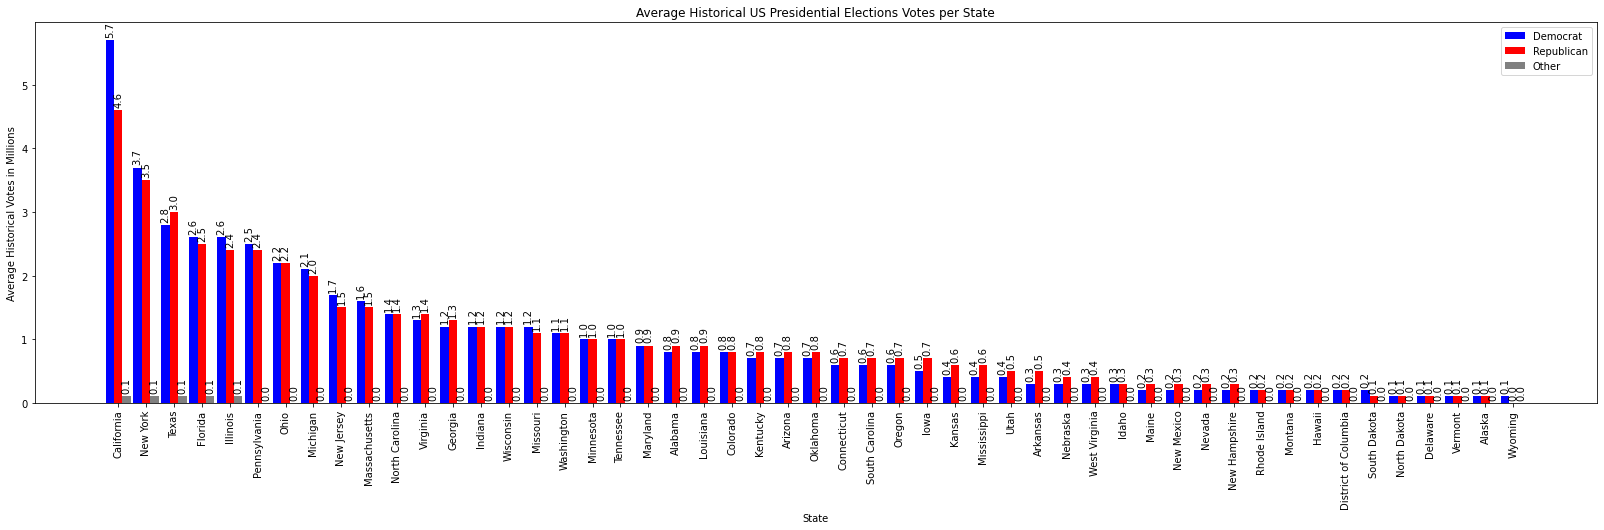

In [12]:
#Chart Historical US Elections
hist_chart=by_state_sorted
hist_chart=hist_chart.reset_index()
labels=hist_chart['State'].unique()
#Series to plot
democrat=round(hist_chart.loc[hist_chart['Party']=='Democrat']['Votes']/1000000,1)
republican=round(hist_chart.loc[hist_chart['Party']=='Republican']['Votes']/1000000,1)
other=round(hist_chart.loc[hist_chart['Party']=='Other']['Votes']/1000000,1)
#Setup plot
x = np.arange(len(labels))
width = 0.3
fig, ax = plt.subplots(figsize=(28,7))
#Plot each series
rects1 = ax.bar(x - (width/2)*2, democrat, width, label='Democrat', color='blue')
rects2 = ax.bar(x, republican, width, label='Republican', color='red')
rects3 = ax.bar(x + width, other, width, label='Other', color='grey')
#SetLabels
ax.set_ylabel('Average Historical Votes in Millions')
ax.set_xlabel('State')
ax.set_title('Average Historical US Presidential Elections Votes per State')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()
#Function to put labels on top or each bar
def toplabels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', rotation=90)
#Set labels and show plot
toplabels(rects1)
toplabels(rects2)
toplabels(rects3)
plt.show()

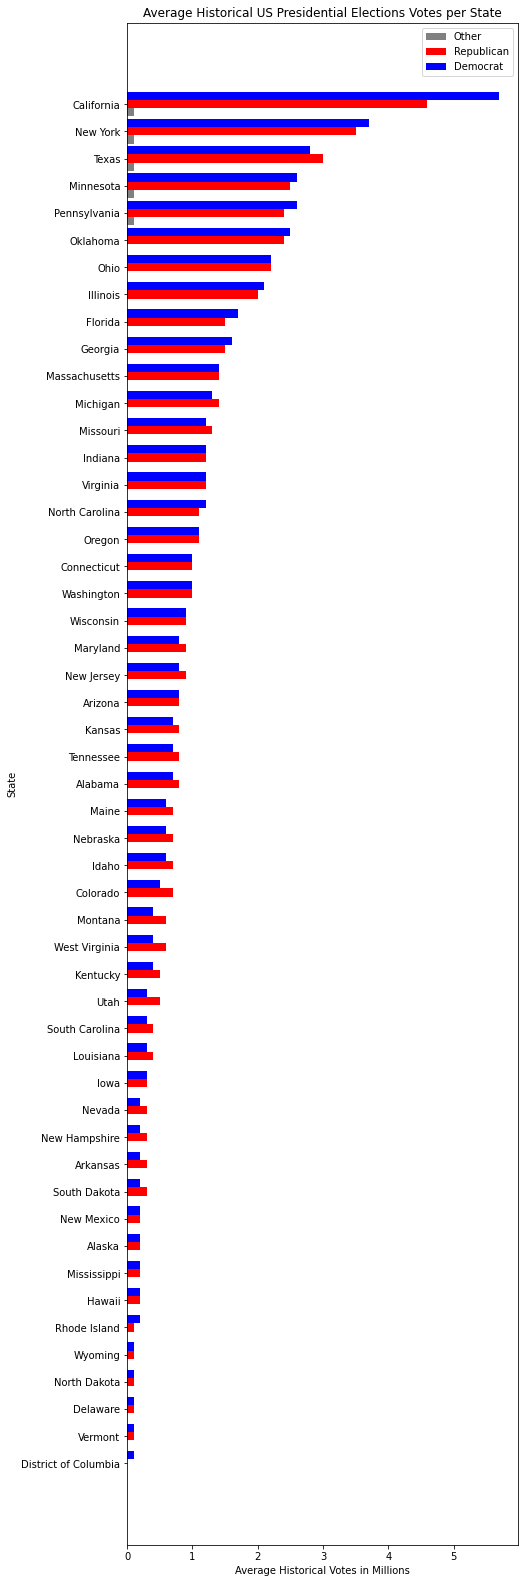

In [37]:
#Chart Historical US Elections
hist_chart=by_state.sort_values(ascending=True)
hist_chart=hist_chart.reset_index()
labels=hist_chart['State'].unique()
#Series to plot
democrat=round(hist_chart.loc[hist_chart['Party']=='Democrat']['Votes']/1000000,1)
republican=round(hist_chart.loc[hist_chart['Party']=='Republican']['Votes']/1000000,1)
other=round(hist_chart.loc[hist_chart['Party']=='Other']['Votes']/1000000,1)
#Setup plot
y = np.arange(len(labels))
# new_y = [2*i for i in y]
width = 0.3
fig, ax = plt.subplots(figsize=(7,28))
#Plot each series
rects1 = ax.barh(x - (width/2)*2, other, width, label='Other', color='gray')
rects2 = ax.barh(x, republican, width, label='Republican', color='red')
rects3 = ax.barh(x + width, democrat, width, label='Democrat', color='blue')
#SetLabels
ax.set_xlabel('Average Historical Votes in Millions')
ax.set_ylabel('State')
ax.set_title('Average Historical US Presidential Elections Votes per State')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()
#Function to put labels on top or each bar
# def toplabels(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', rotation=90)
#Set labels and show plot
# toplabels(rects1)
# toplabels(rects2)
# toplabels(rects3)
plt.show()

In [55]:
elect_coll = hist_chart.loc[hist_chart["State"].isin(["California","New York", "Texas", "Florida", "Illinois", "Pennsylvania"])]
elect_coll_sorted = elect_coll.sort_values(by = "State",ascending=False)
elect_coll_sorted_df = pd.DataFrame(elect_coll_sorted)
elect_coll_sorted_df.dtypes

index      int64
State     object
Party     object
Votes    float64
dtype: object

ValueError: shape mismatch: objects cannot be broadcast to a single shape

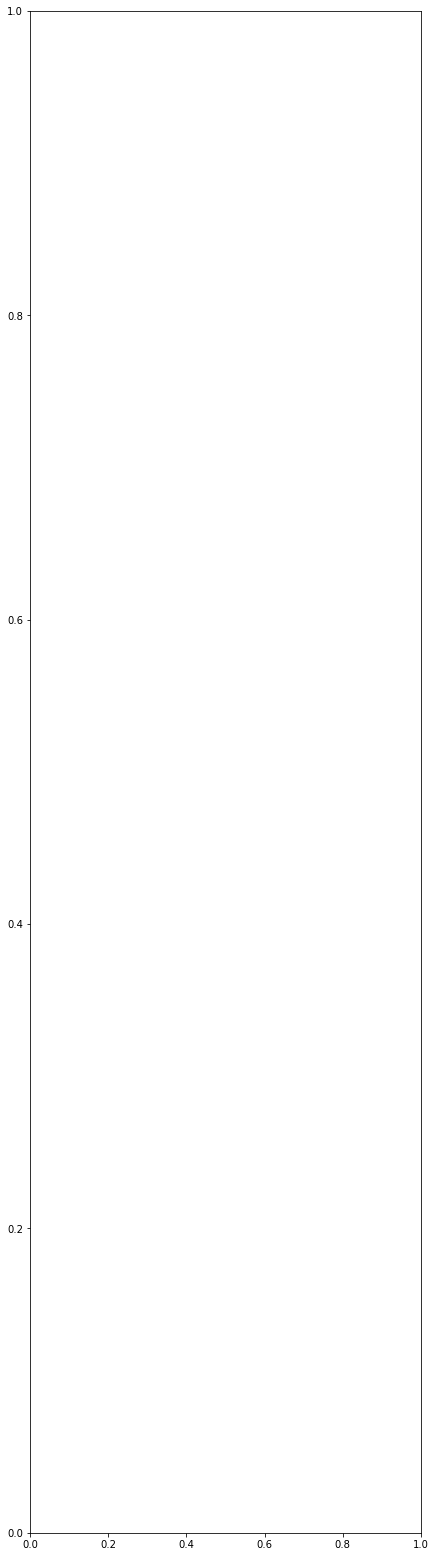

In [56]:
#Chart Historical US Elections
hist_chart_ec = elect_coll_sorted_df
hist_chart_ec =hist_chart_ec.reset_index()
labels=hist_chart_ec['State'].unique()
#Series to plot
democrat=round(hist_chart_ec.loc[hist_chart['Party']=='Democrat']['Votes']/1000000,1)
republican=round(hist_chart_ec.loc[hist_chart['Party']=='Republican']['Votes']/1000000,1)
other=round(hist_chart_ec.loc[hist_chart['Party']=='Other']['Votes']/1000000,1)
#Setup plot
y = np.arange(len(labels))
# new_y = [2*i for i in y]
width = 0.3
fig, ax = plt.subplots(figsize=(7,28))
#Plot each series
rects1 = ax.barh(x - (width/2)*2, other, width, label='Other', color='gray')
rects2 = ax.barh(x, republican, width, label='Republican', color='red')
rects3 = ax.barh(x + width, democrat, width, label='Democrat', color='blue')
#SetLabels
ax.set_xlabel('Average Historical Votes in Millions')
ax.set_ylabel('State')
ax.set_title('Average Historical US Presidential Elections Votes per State')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()
#Function to put labels on top or each bar
# def toplabels(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', rotation=90)
#Set labels and show plot
# toplabels(rects1)
# toplabels(rects2)
# toplabels(rects3)
plt.show()

In [35]:
print(by_state_sorted.iloc[:6])

State       Party     
California  Democrat      5.743670e+06
            Republican    4.618084e+06
New York    Democrat      3.699832e+06
Texas       Republican    3.475207e+06
Florida     Republican    2.998894e+06
            Democrat      2.754560e+06
Name: Votes, dtype: float64


In [31]:
head = by_state_sorted.head(6)
head

State       Party     
California  Democrat      5.743670e+06
            Republican    4.618084e+06
New York    Democrat      3.699832e+06
Texas       Republican    3.475207e+06
Florida     Republican    2.998894e+06
            Democrat      2.754560e+06
Name: Votes, dtype: float64

#### References:
1. MIT Election Data and Science Lab, 2017, "1976-2016-president.tab", U.S. President 1976–2016, https://doi.org/10.7910/DVN/42MVDX/MFU99O, Harvard Dataverse, V5, UNF:6:Mw0hOUHAijKPTVRAe5jJvg==doi/10.7910/DVN/42MVDX/MFU99O